In [1]:
import pandas as pd
import pylab as plt
#plt.style.use('dark_background')
from jupyterthemes import jtplot
jtplot.style()
import seaborn as sns
from zedstat.ci import ci


In [2]:
rf=pd.read_csv('./irat_predictions.csv',index_col=0)
import numpy as np
rf=rf.replace(-1,np.nan).dropna()
rf['Geometric Mean'] = -1*rf['Geometric Mean']
rf.columns

Index(['Influenza Virus', 'Virus Type', 'Dates of Risk Assessment',
       'Potential Emergence Estimate', 'Potential Impact Estimate',
       'Summary Risk Score Category', 'HA Sequence', 'NA Sequence',
       'HA Qnet Sample', 'NA Qnet Sample', 'HA Average Qdistance',
       'NA Average Qdistance', 'Both Average Qdistance', 'Geometric Mean',
       'Predicted Emergence Score', 'Predicted Impact Score'],
      dtype='object')

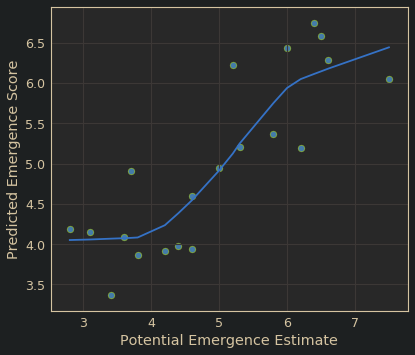

In [3]:
rf.plot.scatter(x='Potential Emergence Estimate',y='Predicted Emergence Score',color='g',s=50)
sns.regplot(x='Potential Emergence Estimate',y='Predicted Emergence Score',data=rf,lowess=1)

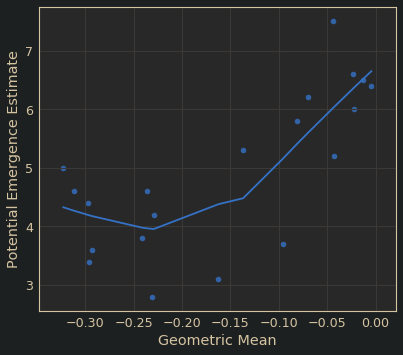

In [4]:
#rf.plot.scatter(y='Potential Emergence Estimate',x='Geometric Mean',color='g',s=50)
ax=sns.regplot(y='Potential Emergence Estimate',x='Geometric Mean',data=rf,lowess=1)


56.80823848467042 0.00039773622938923687 0.7147875089278216


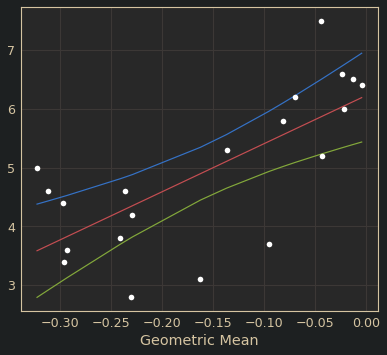

In [5]:
import matplotlib.pyplot as plt

xvar='Geometric Mean'
yvar='Potential Emergence Estimate'


pred,pval,aic,corr,est=ci(rf,xvar,yvar,alpha=.05)
fig, ax = plt.subplots()
pred.ub.plot()
pred.lb.plot()
pred.pred.plot()
rf.set_index(xvar)[yvar].plot(style='wo')
print(aic,pval,corr)

In [6]:
print(est.params)

[6.22589433 8.19077236]


47.05915922759587 4.325698554287492e-06 0.8364290678970031


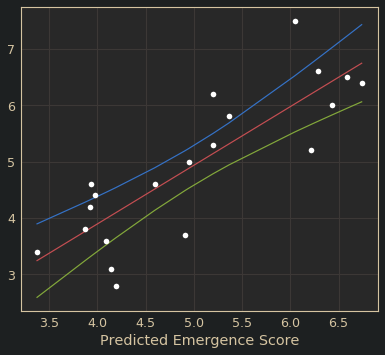

In [9]:
yvar='Potential Emergence Estimate'
xvar='Predicted Emergence Score'

pred,pval,aic,corr,est=ci(rf,xvar,yvar,alpha=.05)
fig, ax = plt.subplots()
pred.ub.plot()
pred.lb.plot()
pred.pred.plot()
rf.set_index(xvar)[yvar].plot(style='wo')
print(aic,pval,corr)

In [ ]:
est.params

49.5537732098707 2.4816298822674898e-05 0.7980639153534737


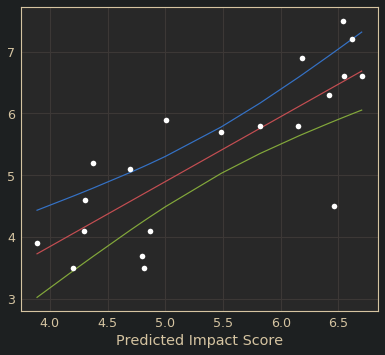

In [11]:
yvar='Potential Impact Estimate'
xvar='Predicted Impact Score'
    
pred,pval,aic,corr,est=ci(rf,xvar,yvar,alpha=.05)
fig, ax = plt.subplots()
pred.ub.plot()
pred.lb.plot()
pred.pred.plot()
rf.set_index(xvar)[yvar].plot(style='wo')
print(aic,pval,corr)

In [ ]:
est.params